<a href="https://colab.research.google.com/github/lingwencong93-ctrl/ling/blob/main/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E4%B8%93%E5%AE%B6%E4%BD%9C%E4%B8%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


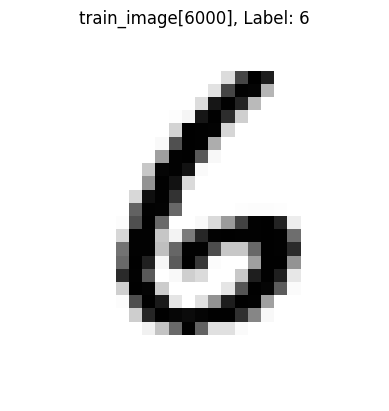

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# 加载 MNIST 数据
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 打印并显示 train_image[6000]
plt.imshow(train_images[6000], cmap='Greys')
plt.title(f"train_image[6000], Label: {train_labels[6000]}")
plt.axis('off')  # 隐藏坐标轴
plt.show()

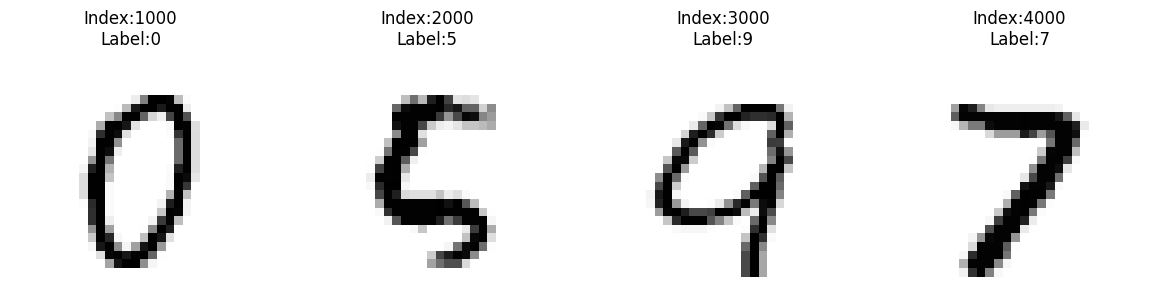

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# 加载 MNIST 数据
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 创建 1 行 4 列的子图布局
fig = plt.figure(figsize=(12, 3))  # 设置画布大小，避免图像拥挤
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

# 分别显示 4 个指定图像，并添加标签标题
ax1.imshow(train_images[1000], cmap='Greys')
ax1.set_title(f"Index:1000\nLabel:{train_labels[1000]}")
ax1.axis('off')

ax2.imshow(train_images[2000], cmap='Greys')
ax2.set_title(f"Index:2000\nLabel:{train_labels[2000]}")
ax2.axis('off')

ax3.imshow(train_images[3000], cmap='Greys')
ax3.set_title(f"Index:3000\nLabel:{train_labels[3000]}")
ax3.axis('off')

ax4.imshow(train_images[4000], cmap='Greys')
ax4.set_title(f"Index:4000\nLabel:{train_labels[4000]}")
ax4.axis('off')

plt.tight_layout()  # 自动调整子图间距
plt.show()

In [3]:
import tensorflow as tf
from tensorflow import keras

# 加载 MNIST 数据（无需训练，仅需构建模型）
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 构建模型：隐藏层节点数改为 128
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # 输入层：28x28 转为 784 维向量
    keras.layers.Dense(128, activation='relu'),  # 隐藏层：128 个节点
    keras.layers.Dense(10, activation='softmax')  # 输出层：10 个类别（0-9）
])

# 查看模型结构和参数
print("Model Summary (Hidden Layer: 128 Nodes):")
model.summary()

Model Summary (Hidden Layer: 128 Nodes):


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
import tensorflow as tf
from tensorflow import keras

# 加载 MNIST 数据并预处理
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # 归一化

# 构建模型（使用作业3的 128 节点隐藏层，或原 256 节点均可，核心是优化器）
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# 编译模型：优化器改为 SGD（随机梯度下降）
model.compile(
    optimizer='sgd',  # 替换 adam 为 sgd
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model Compiled with SGD Optimizer Successfully!")
# 可选：执行 1 个 epoch 验证编译有效性（非必需，仅为截图输出）
history = model.fit(train_images, train_labels, epochs=1, verbose=1)

Model Compiled with SGD Optimizer Successfully!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7310 - loss: 1.0314


In [5]:
import tensorflow as tf
from tensorflow import keras

# 加载并预处理 MNIST 数据
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# 定义模型（统一使用 128 节点隐藏层、SGD 优化器）
def build_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 1. 训练 epochs=2
print("=== Training with epochs=2 ===")
model_2epochs = build_model()
history_2 = model_2epochs.fit(train_images, train_labels, epochs=2, verbose=1)
test_loss_2, test_acc_2 = model_2epochs.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy (epochs=2): {test_acc_2:.4f}\n")

# 2. 训练 epochs=5
print("=== Training with epochs=5 ===")
model_5epochs = build_model()
history_5 = model_5epochs.fit(train_images, train_labels, epochs=5, verbose=1)
test_loss_5, test_acc_5 = model_5epochs.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy (epochs=5): {test_acc_5:.4f}")

=== Training with epochs=2 ===
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7240 - loss: 1.0504
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9011 - loss: 0.3571
Test Accuracy (epochs=2): 0.9176

=== Training with epochs=5 ===
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7276 - loss: 1.0540
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9015 - loss: 0.3568
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9167 - loss: 0.2972
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9262 - loss: 0.2626
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9324 - loss: 0.2408
Test Accuracy (epochs=5): 0.9373
